# Qredo transaction activity - Data Analysis

#### Maria Silva, May 2023

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

**Transaction overview:**


| Category | Transaction type | Fee |
|---|---|---|
| QRDO |  |  |
|  | Withdrawls | Billable |
|  | Deposits | Protocol * |
|  | QL2 | Protocol |
|  | Vesting | Protocol |
|  | Staking | Protocol |
| Other tokens |  |  |
|  | Withdrawals | Billable |
|  | Deposits | Protocol * |
|  | QL2 | Protocol |
| MMI | MMI | Billable |
| Internal |  |  |
|  | IDdoc | Protocol * |
|  | KVAssets | Protocol * |
|  | Control | Protocol * |

## Data import

In [3]:
file = os.path.realpath("../data/agg_tx.csv")
agg_df = pd.read_csv(file)
agg_df["day"] = pd.to_datetime(agg_df["day"])
agg_df.head()

,day,tx_group,tx_type,tx_count,amount_usd
0,2021-08-26,qrdo,withdraw,2,1.000000e+06
1,2021-08-30,qrdo,withdraw,6,2.500410e+07
2,2021-09-05,qrdo,withdraw,2,2.002000e+05
3,2021-09-06,qrdo,deposit,15,2.114224e+04
4,2021-09-06,qrdo,withdraw,1,3.754100e+04


In [5]:
agg_df["day"].agg(["min", "max"])

min   2021-08-26
max   2023-05-19
Name: day, dtype: datetime64[ns]

In [7]:
temp_df = agg_df.groupby("tx_type")["tx_count"].sum()/agg_df["tx_count"].sum()
temp_df.sort_values(ascending=False)

tx_type
staking       0.433351
vestingOut    0.190463
vestingIn     0.188565
mmi           0.105392
withdraw      0.036580
ql2           0.033496
deposit       0.012152
Name: tx_count, dtype: float64

## Transaction counts

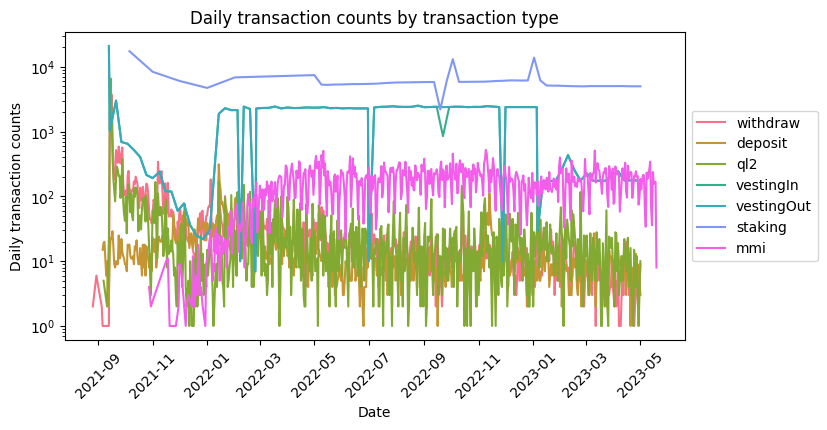

In [23]:
plt.figure(figsize=(8,4))
sns.lineplot(data=agg_df, x="day", y="tx_count",hue="tx_type", palette="husl")
plt.ylabel("Daily transaction counts")
plt.xlabel("Date")
plt.xticks(rotation=45)
plt.yscale('log')
plt.title("Daily transaction counts by transaction type")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [29]:
agg_df.groupby("tx_type")["tx_count"].agg(["mean", "std"])

,mean,std
tx_type,,
deposit,16.374793,19.827801
mmi,163.110476,100.499816
ql2,46.602740,293.568977
staking,6070.775862,2254.664654
vestingIn,1683.648352,2318.559420
vestingOut,1700.593407,2318.063368
withdraw,49.536667,193.502517


In [31]:
temp_df = agg_df.groupby("tx_type")["tx_count"].quantile([0, 0.25, 0.5, 0.75, 1]).reset_index()
temp_df["quantile"] = temp_df["level_1"]
temp_df.pivot(index='tx_type', columns='quantile', values='tx_count')

quantile,0.00,0.25,0.50,0.75,1.00
tx_type,,,,,
deposit,1.0,7.00,11.0,19.0,313.0
mmi,1.0,81.00,168.0,231.0,523.0
ql2,1.0,7.00,16.0,32.0,6611.0
staking,2209.0,5093.50,5666.0,5969.0,17507.0
vestingIn,7.0,184.50,2289.0,2401.0,21069.0
vestingOut,7.0,184.50,2289.0,2401.0,21069.0
withdraw,1.0,9.75,17.0,33.0,3745.0
